# Problem 1

In [1]:
import torch
import numpy as np
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# Prepare dataset

alpha = 0.1
K = 1000
B = 128
N = 512

def f_true(x) :
    return (x-2) * np.cos(x*4)

torch.manual_seed(0)
X_train = torch.normal(0.0, 1.0, (N,))
y_train = f_true(X_train)
X_val = torch.normal(0.0, 1.0, (N//5,))
y_val = f_true(X_val)

train_dataloader = DataLoader(TensorDataset(X_train.unsqueeze(1), y_train.unsqueeze(1)), batch_size=B)
test_dataloader = DataLoader(TensorDataset(X_val.unsqueeze(1), y_val.unsqueeze(1)), batch_size=B)

In [3]:
# Define the Neural Network Class

n0, n1, n2, n3 = 1, 64, 64, 1

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(n0, n1, bias=True)
        self.l2 = nn.Linear(n1, n2, bias=True)
        self.l3 = nn.Linear(n2, n3, bias=True)

    def forward(self, x):
        x = x.float().view(-1, 1)
        x1 = torch.sigmoid(self.l1(x))
        x2 = torch.sigmoid(self.l2(x1))
        x3 = self.l3(x2)
        return x3

In [4]:
# Create Model, Initialize Weights, Specify Loss Function and Optimizer

model = MLP()                                

model.l1.weight.data = torch.normal(0, 1, model.l1.weight.shape)
model.l1.bias.data = torch.full(model.l1.bias.shape , 0.03)
model.l2.weight.data = torch.normal(0, 1, model.l2.weight.shape)
model.l2.bias.data = torch.full(model.l2.bias.shape , 0.03)
model.l3.weight.data = torch.normal(0, 1, model.l3.weight.shape)
model.l3.bias.data = torch.full(model.l3.bias.shape , 0.03)

loss_function = torch.nn.MSELoss()                               
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

In [5]:
# Train Model with Shuffled Cyclic SGD

for _ in range(K):
    for x, y in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss_function(model(x), y)
        train_loss.backward()
        optimizer.step()

In [6]:
# Test Model

test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

for ind in range(len(X_val)) :

    x, y = X_val[ind], y_val[ind]
    output = model(x)
    test_loss += loss_function(output, y.float().view(-1, 1)).item()

    if output.item() * y.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(X_val.data), correct, len(X_val.data),
        100. * correct / len(X_val.data)))

[Test set] Average loss: 1.2829, Accuracy: 90/102 (88.24%)



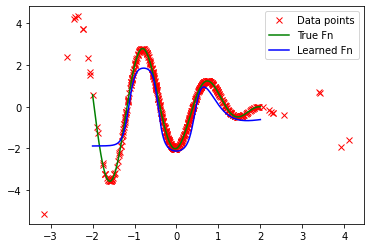

In [7]:
# Plot Results

with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'g',label='True Fn')
    plt.plot(xx, model(xx),'b',label='Learned Fn')
plt.legend()
plt.show()

# Problem 2

In [8]:
y_train = f_true(X_train) + torch.normal(0, 0.5, X_train.shape)

In [9]:
# Create Model, Initialize Weights, Specify Loss Function and Optimizer

model = MLP()                                

model.l1.weight.data = torch.normal(0, 1, model.l1.weight.shape)
model.l1.bias.data = torch.full(model.l1.bias.shape , 0.03)
model.l2.weight.data = torch.normal(0, 1, model.l2.weight.shape)
model.l2.bias.data = torch.full(model.l2.bias.shape , 0.03)
model.l3.weight.data = torch.normal(0, 1, model.l3.weight.shape)
model.l3.bias.data = torch.full(model.l3.bias.shape , 0.03)

loss_function = torch.nn.MSELoss()                               
optimizer = torch.optim.SGD(model.parameters(), lr=alpha)

In [10]:
# Train Model with Shuffled Cyclic SGD

for _ in range(K):
    for x, y in train_dataloader:
        optimizer.zero_grad()
        train_loss = loss_function(model(x), y)
        train_loss.backward()
        optimizer.step()

In [11]:
# Test Model

test_loss, correct = 0, 0
misclassified_ind = []
correct_ind = []

for ind in range(len(X_val)) :

    x, y = X_val[ind], y_val[ind]
    output = model(x)
    test_loss += loss_function(output, y.float().view(-1, 1)).item()

    if output.item() * y.item() >= 0 :
        correct += 1
        correct_ind += [ind]
    else:
        misclassified_ind += [ind]

print('[Test set] Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss /len(X_val.data), correct, len(X_val.data),
        100. * correct / len(X_val.data)))

[Test set] Average loss: 0.1395, Accuracy: 96/102 (94.12%)



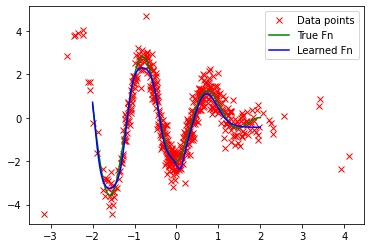

In [12]:
# Plot Results

with torch.no_grad():
    xx = torch.linspace(-2,2,1024).unsqueeze(1)
    plt.plot(X_train,y_train,'rx',label='Data points')
    plt.plot(xx,f_true(xx),'g',label='True Fn')
    plt.plot(xx, model(xx),'b',label='Learned Fn')
plt.legend()
plt.show()

Problem 2 is different from problem 1 in that the training labels have some random errors. Nevertheless the training result still successfully came out, with an accuracy of 94%. The plot also shows that the result is fairly accurate. 

Also since there are two hidden layers in this problem, the number of trainable parameters is 
$$(1 \times 64 + 64) + (64 \times 64 + 64) + (64 \times 1 + 1) = 4353.$$